In [2]:
import pandas as pd
import numpy as np
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle
from torchsummary import summary
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [3]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns=["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight","rings"]
df = pd.read_csv(link, names=columns)
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


age = 1.5+rings

In [4]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

<Axes: >

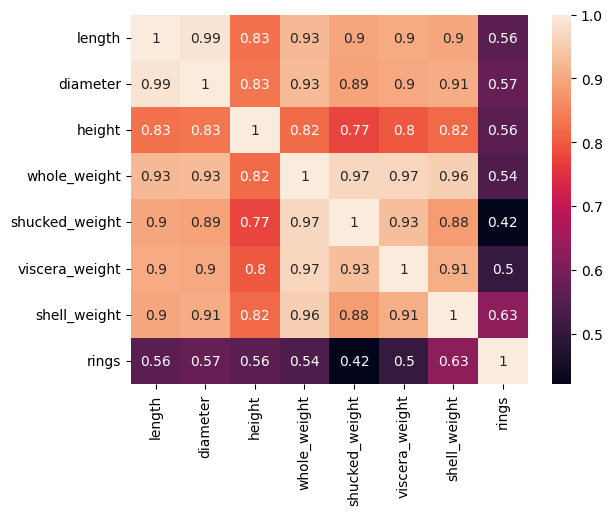

In [5]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='number of rings', ylabel='count'>

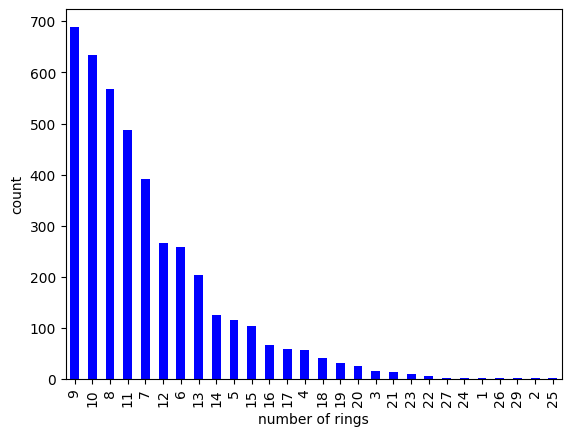

In [7]:
plt.xlabel('number of rings')
plt.ylabel('count')
df['rings'].value_counts().plot(kind='bar',color='blue')

In [8]:
def encoder(features,data):
  from sklearn.preprocessing import LabelEncoder
  lab_enc= LabelEncoder()
  for i in features:                
    data[i]=lab_enc.fit_transform(data[i])
  return data

cat_list = ["rings"]
df = encoder(cat_list,df)
print(df[cat_list])


      rings
0        14
1         6
2         8
3         9
4         6
...     ...
4172     10
4173      9
4174      8
4175      9
4176     11

[4177 rows x 1 columns]


In [9]:
df = pd.get_dummies(df, columns = ['sex'])
print(df)

      length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      shell_weight  rings  sex_F  sex_I

In [10]:

def normalize_feature(list_features):
  for i in list_features:
    df[i] = ((df[i] - min(df[i])))/(max(df[i])-min(df[i]))
  return df

lf = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight']

df = normalize_feature(lf)
print(df[lf])

        length  diameter    height  whole_weight  shucked_weight  \
0     0.513514  0.521008  0.084071      0.181335        0.150303   
1     0.371622  0.352941  0.079646      0.079157        0.066241   
2     0.614865  0.613445  0.119469      0.239065        0.171822   
3     0.493243  0.521008  0.110619      0.182044        0.144250   
4     0.344595  0.336134  0.070796      0.071897        0.059516   
...        ...       ...       ...           ...             ...   
4172  0.662162  0.663866  0.146018      0.313441        0.248151   
4173  0.695946  0.647059  0.119469      0.341420        0.294553   
4174  0.709459  0.705882  0.181416      0.415796        0.352724   
4175  0.743243  0.722689  0.132743      0.386931        0.356422   
4176  0.858108  0.840336  0.172566      0.689393        0.635171   

      viscera_weight  shell_weight  
0           0.132324      0.147982  
1           0.063199      0.068261  
2           0.185648      0.207773  
3           0.149440      0.152965 

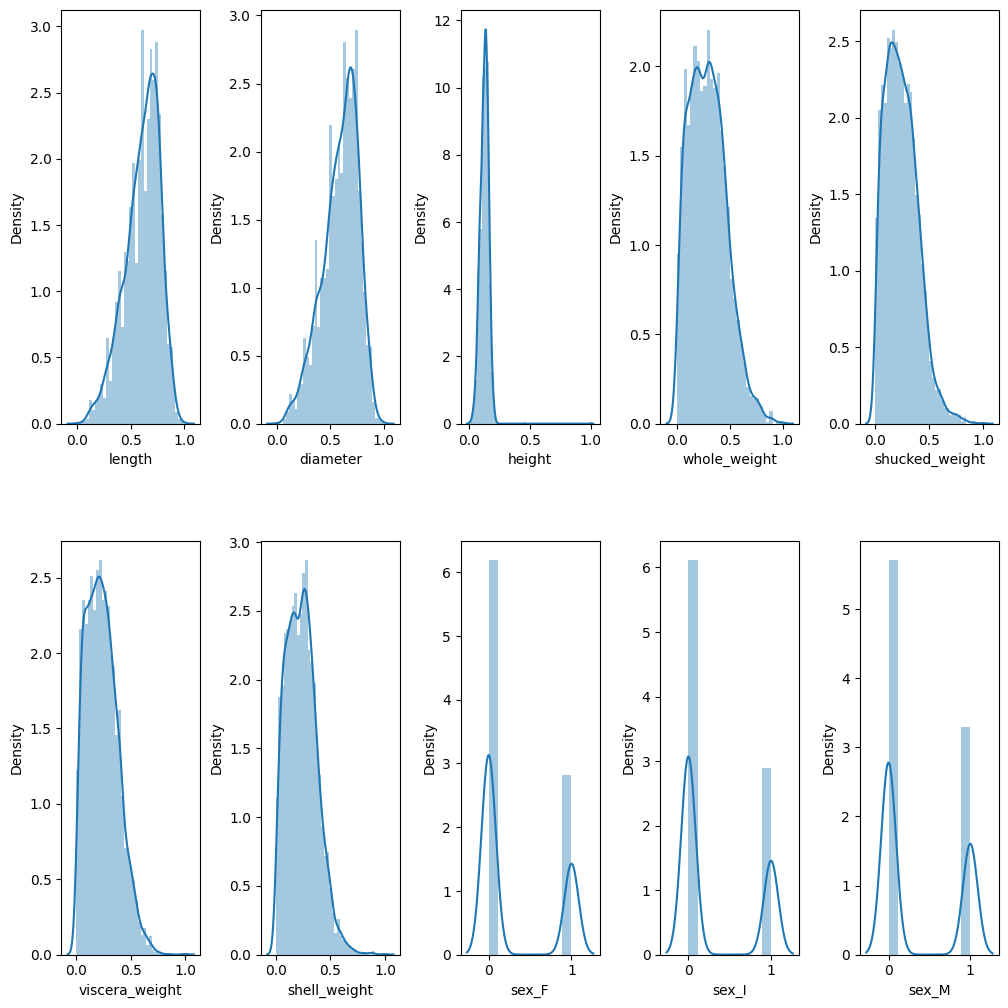

In [11]:
fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (10, 10))
index = 0

axs = axs.flatten()
df3 = df.drop(columns=['rings'])
for k, v in df3.items():
    sns.distplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [12]:
from sklearn.model_selection import train_test_split
Y=df['rings']
X=df.drop(columns=['rings'])
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
X_train=x_train.values
X_test=x_test.values



In [27]:
def get_accuracy(logit, target, batch_size):
    
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [28]:
#Define training hyperprameters.
batch_size = 32 
num_epochs = 500
learning_rate = 0.1
size_hidden_1 = 128 
size_hidden_2 = 50 
num_classes = 28
 
batch_no = len(X_train) // batch_size  
cols = X_train.shape[1] 

In [29]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        self.hidden_layer_2 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_2 = torch.nn.Tanh() # activation layer
        
        self.output_layer = torch.nn.Linear(size_hidden_1, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        y = self.activation_1(self.hidden_layer_1(x))      # activation function for hidden layer
        z = self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        w = self.output_act(self.output_layer(y+z))                    # output
        return w

net = Net(cols, size_hidden_1, num_classes)
#summary(Net, (1, 4))